# Seeing The Forest: Tree Equity in Oakland, California
## Elliott Shaw's and Michael Rosen's 206A midterm

### What is tree equity, and why does it matter?

For our 206A midterm, we will be analyzing the distribution of street trees in Oakland, California. But before we get into all of that, we'd like to start by explaining the stakes of our investigation.

First, and most importantly, trees are our best weapon against urban heat islands. As the planet warms and days with extreme heat become more frequent, the massive protection trees provide will only be more important.

Trees provide countless benefits to their surroundings, including:

 - Improved air quality
 - Noise absorption
 - Contributions to a more vibrant ecosystem
 - Looking nice

Given all of these benefits of trees, we are curious if...

### Research Question

#### Are trees equally distributed across the city of Oakland, or are there variations that can be predicted by socioeconomic indicators?

For our investigation, we'll be bringing in a few datasets...

### Data Sources

First, we'll upload the necessary libraries and then bring in our street trees dataset, courtesy of the city of Oakland. 

In [1]:
import pandas as pd
import geopandas as gpd
oaktrees=gpd.read_file('https://opendata.arcgis.com/datasets/385456a220174ef1854738b4029df3fd_0.geojson')

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Next, we'll bring in our American Community Survey datasets: Table B19001 for household income, Table B03002 for race, and Table B15003 for educational attainment.

 

In [2]:
oakincome=gpd.read_file('oakdata.geojson')
oakrace=gpd.read_file('oakrace.geojson')
oakeduc=gpd.read_file('oakeduc.geojson')

Everything's looking good so far, so we're going to move onto...

### Data Exploration and Data Cleaning

To start, let's make sure all of our dataframes are looking as expected.

In [3]:
oakincome.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",219861.0,17887.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",237500.0,23842.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",162583.0,63106.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",183482.0,79006.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",101736.0,36064.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


In [4]:
oakrace.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",990.0,138.0,894.0,129.0,761.0,129.0,13.0,13.0,...,12.0,5.0,7.0,23.0,25.0,0.0,12.0,23.0,25.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",1017.0,123.0,939.0,129.0,714.0,116.0,39.0,46.0,...,12.0,12.0,14.0,32.0,34.0,14.0,25.0,18.0,25.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,238.0,1059.0,241.0,735.0,215.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",1237.0,263.0,1139.0,255.0,1008.0,248.0,18.0,27.0,...,12.0,37.0,60.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


In [5]:
oakeduc.tail()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
333,15000US060019819001,"Block Group 1, Alameda, CA",58.0,43.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,30.0,17.0,4.0,5.0,0.0,12.0,9.0,13.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
334,15000US060019820001,"Block Group 1, Alameda, CA",49.0,20.0,4.0,5.0,0.0,12.0,0.0,12.0,...,12.0,14.0,13.0,13.0,9.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
335,15000US060019832001,"Block Group 1, Alameda, CA",542.0,64.0,19.0,25.0,0.0,12.0,0.0,12.0,...,14.0,233.0,43.0,133.0,35.0,43.0,16.0,18.0,14.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
336,15000US060019900000,"Block Group 0, Alameda, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."
337,16000US0653000,"Oakland, CA",308577.0,1640.0,11429.0,859.0,78.0,84.0,287.0,111.0,...,934.0,77864.0,1520.0,38590.0,1071.0,11609.0,635.0,7821.0,491.0,"MULTIPOLYGON (((-122.35588 37.83573, -122.3507..."


The good news: this looks like data, and each dataframe has a geometry column. The bad news: it looks like we've got some serious data cleaning ahead of us. Right away, we can see we need to rename columns. Secondly, we need to remove the citywide summary row for each dataframe. Finally, and most onerously, we're going to have to calculate proportions for oakrace and oakeduc. Let's get started!

We're going to go one dataframe at a time, starting with oakincome. Let's take a look again:

In [6]:
oakincome.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",219861.0,17887.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",237500.0,23842.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",162583.0,63106.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",183482.0,79006.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",101736.0,36064.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


First, we'll rename the columns.

In [7]:
oakincome.columns = ['geoid',
                   'name',
                   'Median Income',
                   'Margin Of Error',
                   'geometry']

In [8]:
oakincome.head()

,geoid,name,Median Income,Margin Of Error,geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",219861.0,17887.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",237500.0,23842.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",162583.0,63106.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",183482.0,79006.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",101736.0,36064.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


Nice! Now, we'll remove the summary row.

In [9]:
oakincome=oakincome.drop([337])

In [10]:
oakincome.tail()

,geoid,name,Median Income,Margin Of Error,geometry
332,15000US060014105001,"Block Group 1, Alameda, CA",31151.0,8384.0,"MULTIPOLYGON (((-122.29360 37.80530, -122.2935..."
333,15000US060019819001,"Block Group 1, Alameda, CA",171563.0,90615.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
334,15000US060019820001,"Block Group 1, Alameda, CA",128750.0,50357.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
335,15000US060019832001,"Block Group 1, Alameda, CA",165909.0,19991.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
336,15000US060019900000,"Block Group 0, Alameda, CA",NaN,NaN,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."


Mercifully, we don't have to create any new variables for this dataframe, so we'll now move onto oakrace. Let's take care of the labeling and summary row dropping...

In [11]:
list(oakrace)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [12]:
oakrace_columnstokeep=['geoid',
                       'name',
                       'B03002001',
                       'B03002002',
                       'B03002003',
                       'B03002004',
                       'B03002005',
                       'B03002006',
                       'B03002007',
                       'B03002008',
                       'B03002009',
                       'B03002012',
                       'geometry']
oakrace=oakrace[oakrace_columnstokeep]                       
                       

In [13]:
oakrace.tail()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
333,15000US060019819001,"Block Group 1, Alameda, CA",58.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
334,15000US060019820001,"Block Group 1, Alameda, CA",63.0,55.0,10.0,23.0,2.0,20.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
335,15000US060019832001,"Block Group 1, Alameda, CA",583.0,536.0,308.0,53.0,9.0,138.0,3.0,5.0,20.0,47.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
336,15000US060019900000,"Block Group 0, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."
337,16000US0653000,"Oakland, CA",425097.0,310155.0,120225.0,98749.0,1455.0,65195.0,2237.0,1812.0,20482.0,114942.0,"MULTIPOLYGON (((-122.35588 37.83573, -122.3507..."


In [14]:
oakrace=oakrace.drop([337])

And now for the tricky part — creating some proportional variables.

In [15]:
oakrace.columns= ['geoid', 'name', 
                   'Total', 
                   'Not Hispanic or Latino', 
                   'White alone', 
                   'Black or African American alone', 
                   'American Indian and Alaska Native alone',
                   'Asian alone',
                   'Native Hawaiian and Other Pacific Islander alone',
                   'Some other race alone',
                   'Two or more races',
                   'Hispanic or Latino',
                   'geometry']

In [16]:
oakrace['Percent Non Hispanic'] = oakrace['Not Hispanic or Latino']/oakrace['Total']*100
oakrace['Percent White'] = oakrace['White alone']/oakrace['Total']*100
oakrace['Percent Black'] = oakrace['Black or African American alone']/oakrace['Total']*100
oakrace['Percent Native American'] = oakrace['American Indian and Alaska Native alone']/oakrace['Total']*100
oakrace['Percent Asian'] = oakrace['Asian alone']/oakrace['Total']*100
oakrace['Percent Hawaiian/PI'] = oakrace['Native Hawaiian and Other Pacific Islander alone']/oakrace['Total']*100
oakrace['Percent other race'] = oakrace['Some other race alone']/oakrace['Total']*100
oakrace['Percent two or more races'] = oakrace['Two or more races']/oakrace['Total']*100
oakrace['Percent Hispanic/Latino'] = oakrace['Hispanic or Latino']/oakrace['Total']*100

No errors, so we're going to assume oakrace datacleaning is done! Now onto our final dataframe: oakeduc. We'll omit the narration on this one as it's just a repeat of the first two steps.

In [17]:
list(oakeduc)

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

Okay, we lied — here, we're going to make two buckets: high school or less and some college, in order to limit the number of columns.

In [18]:
oakeduc['High school or less']=oakeduc['B15003002']+oakeduc['B15003003']+oakeduc['B15003004']+oakeduc['B15003005']+oakeduc['B15003006']+oakeduc['B15003007']+oakeduc['B15003008']+oakeduc['B15003009']+oakeduc['B15003010']+oakeduc['B15003011']+oakeduc['B15003012']+oakeduc['B15003013']+oakeduc['B15003014']+oakeduc['B15003015']+oakeduc['B15003016']+oakeduc['B15003017']
oakeduc['Some college']=oakeduc['B15003019']+oakeduc['B15003020']

In [19]:
oakeduccol=['geoid',
            'name',
            'B15003001',
            'B15003018',
            'B15003021',
            'B15003022',
            'B15003023',
            'B15003024',
            'B15003025',
            'geometry',
            'High school or less',
            'Some college']
oakeduc=oakeduc[oakeduccol]

In [20]:
oakeduc.columns=['geoid',
                 'name',
                 'Total',
                 'GED',
                 'Associates',
                 'Bachelor',
                 'Master',
                 'Professional school',
                 'Doctorate',
                 'geometry',
                 'High school or less',
                 'Some college']

In [21]:
oakeduc=oakeduc.drop([337])

In [22]:
oakeduc['Percent GED'] = oakeduc['GED']/oakeduc['Total']*100
oakeduc['Percent Associates'] = oakeduc['Associates']/oakeduc['Total']*100
oakeduc['Percent Bachelor'] = oakeduc['Bachelor']/oakeduc['Total']*100
oakeduc['Percent Master'] = oakeduc['Master']/oakeduc['Total']*100
oakeduc['Percent Professional school'] = oakeduc['Professional school']/oakeduc['Total']*100
oakeduc['Percent Doctorate'] = oakeduc['Doctorate']/oakeduc['Total']*100
oakeduc['Percent High school or less'] = oakeduc['High school or less']/oakeduc['Total']*100
oakeduc['Percent Some college'] = oakeduc['Some college']/oakeduc['Total']*100

In [23]:
oakeduc.head()

,geoid,name,Total,GED,Associates,Bachelor,Master,Professional school,Doctorate,geometry,High school or less,Some college,Percent GED,Percent Associates,Percent Bachelor,Percent Master,Percent Professional school,Percent Doctorate,Percent High school or less,Percent Some college
0,15000US060014001001,"Block Group 1, Alameda, CA",2509.0,0.0,67.0,855.0,792.0,315.0,213.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466...",152.0,115.0,0.0,2.670387,34.077322,31.566361,12.554803,8.489438,6.058191,4.583499
1,15000US060014002001,"Block Group 1, Alameda, CA",743.0,0.0,17.0,253.0,253.0,110.0,76.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542...",12.0,22.0,0.0,2.288022,34.051144,34.051144,14.804845,10.228802,1.615074,2.960969
2,15000US060014002002,"Block Group 2, Alameda, CA",822.0,0.0,8.0,235.0,313.0,44.0,70.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577...",87.0,65.0,0.0,0.973236,28.588808,38.077859,5.352798,8.515815,10.583942,7.907543
3,15000US060014003001,"Block Group 1, Alameda, CA",823.0,0.0,0.0,351.0,249.0,107.0,61.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517...",35.0,20.0,0.0,0.000000,42.648846,30.255164,13.001215,7.411908,4.252734,2.430134
4,15000US060014003002,"Block Group 2, Alameda, CA",1034.0,0.0,21.0,487.0,170.0,78.0,82.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622...",96.0,100.0,0.0,2.030948,47.098646,16.441006,7.543520,7.930368,9.284333,9.671180


Alright! We've got three beautifully labeled and filtered dataframes, which means it's time for...

### Data Analysis

Before we do anything, we're going to need to bring any necessary libraries for conducting analysis.

In [24]:
import numpy as np
import matplotlib as plt
import statsmodels.api as sm

Just to give a quick overview, we're going to create three simple plots, one for each of the census variables.

AttributeError: 'GeoplotAccessor' object has no attribute 'title'

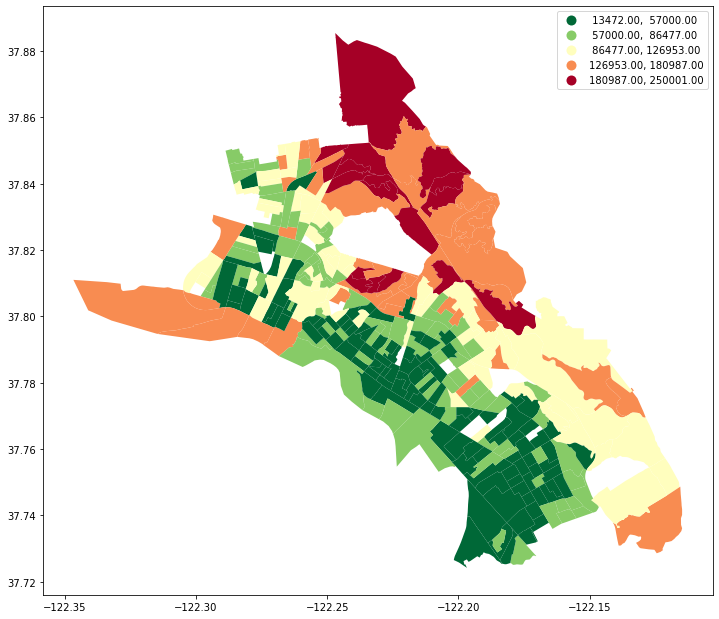

In [44]:
oakincome.plot(figsize=(12,12),
            column='Median Income',
            legend=True,
            cmap='RdYlGn_r',
            scheme='Natural_breaks')
oakincome.plot.title('graph')

<AxesSubplot:>

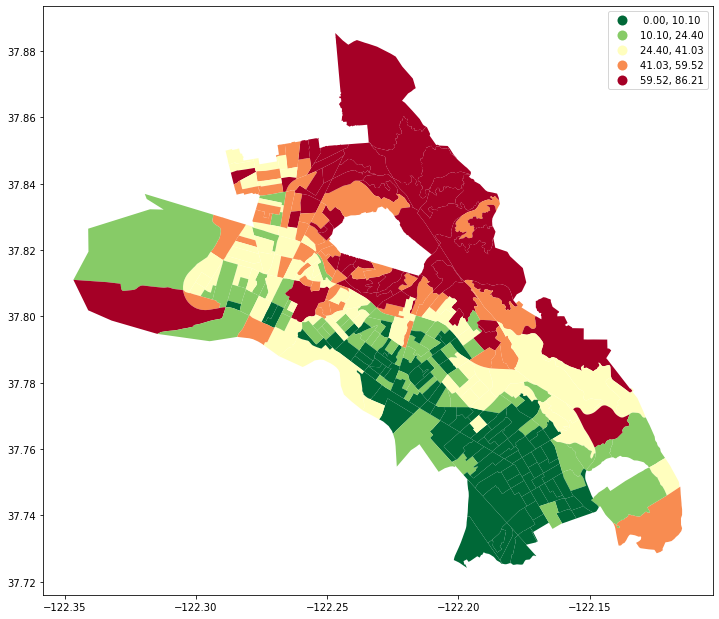

In [40]:
oakrace.plot(figsize=(12,12),
            column='Percent White',
            legend=True,
            cmap='RdYlGn_r',
            scheme='Natural_breaks')

<AxesSubplot:>

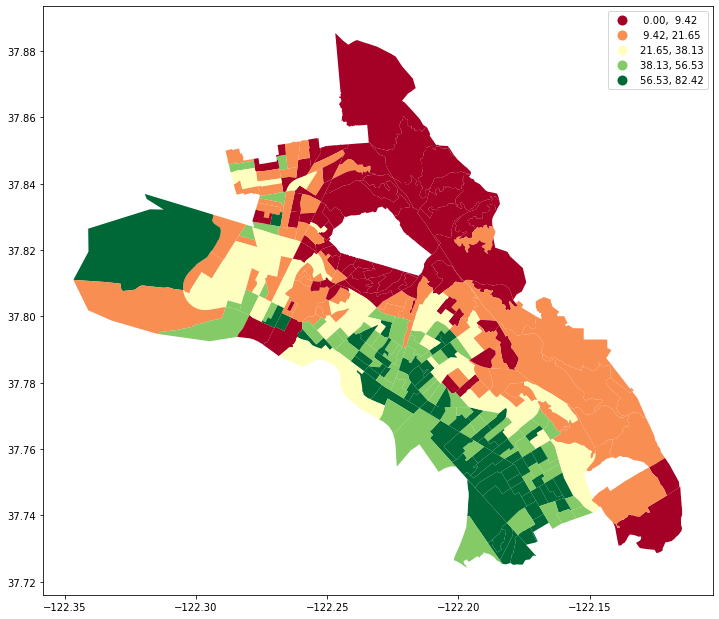

In [41]:
oakeduc.plot(figsize=(12,12),
            column='Percent High school or less',
            legend=True,
            cmap='RdYlGn',
            scheme='quantiles')

The takeaways here ought to be pretty clear. Many cities have geography that predictably maps onto socioeconomic indicators, but the clustering of socioeconomic characteristics is profound in Oakland. Three ostensibly different variables produce extremely similar maps.